# Solving Linear Systems: 2 variables

By completing this lab, you will be able to use basic programming skills with Python and `NumPy` package to solve systems of linear equations. In this notebook you will:

- Use `NumPy` linear algebra package to find the solutions of the system of linear equations
- Find the solution for the system of linear equations using elimination method
- Evaluate the determinant of the matrix and examine the relationship between matrix singularity and number of solutions of the linear system

# Table of Contents

- [ 1 - Representing and Solving System of Linear Equations using Matrices](#1)
  - [ 1.1 - System of Linear Equations](#1.1)
  - [ 1.2 - Solving Systems of Linear Equations using Matrices](#1.2)
  - [ 1.3 - Evaluating Determinant of a Matrix](#1.3)
- [ 2 - Solving System of Linear Equations using Elimination Method](#2)
  - [ 2.1 - Elimination Method](#2.1)
  - [ 2.2 - Preparation for the Implementation of Elimination Method in the Code](#2.2)
  - [ 2.3 - Implementation of Elimination Method](#2.3)
  - [ 2.4 - Graphical Representation of the Solution](#2.4)
- [ 3 - System of Linear Equations with No Solutions](#3)
- [ 4 - System of Linear Equations with Infinite Number of Solutions](#4)

## Packages

Load the `NumPy` package to access its functions.

In [2]:
import numpy as np

<a name='1'></a>
## 1 - Representing and Solving System of Linear Equations using Matrices

<a name='1.1'></a>
### 1.1 - System of Linear Equations

A **system of linear equations** (or **linear system**) is a collection of one or more linear equations involving the same variables. For example:


$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1+2x_2=1, \end{cases}\tag{1}$$

is a system of two equations with two unknown variables $x_1$, $x_2$. **To solve** a system of linear equations means to find such values of the variables $x_1$, $x_2$, that all of its equations are simultaneously satisfied.

A linear system is **inconsistent** if it has no solution, and otherwise it is said to be **consistent**. Consistent system can have one or infinite number of solutions.

<a name='1.2'></a>
### 1.2 - Solving Systems of Linear Equations using Matrices

Linear systems with two equations are easy to solve manually, but preparing for more complicated cases, you will investigate some solution techniques. 

`NumPy` linear algebra package provides quick and reliable way to solve the system of linear equations using function `np.linalg.solve(A, b)`. Here $A$ is a matrix, each row of which represents one equation in the system and each column corresponds to the variable $x_1$, $x_2$. And $b$ is a 1-D array of the free (right side) coefficients. More information about the `np.linalg.solve()` function can be found in [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html).

Given the system of linear equations $(1)$, you can set matrix $A$ and 1-D array $b$ as:

In [3]:
A = np.array([
        [-1, 3],
        [3, 2]
    ], dtype=np.dtype(float))

b = np.array([7, 1], dtype=np.dtype(float))

print("Matrix A:")
print(A)
print("\nArray b:")
print(b)

Matrix A:
[[-1.  3.]
 [ 3.  2.]]

Array b:
[7. 1.]


Check the dimensions of $A$ and $b$ using the `shape` attribute (you can also use `np.shape()` as an alternative):

In [24]:
print(f"Shape of A: {A.shape}")
print(f"Shape of b: {b.shape}")
print(f"Reshaped b is {b.reshape((2, 1)).shape}")


# print(f"Shape of A: {np.shape(A)}")
# print(f"Shape of A: {np.shape(b)}")

Shape of A: (2, 2)
Shape of b: (2,)
Reshaped b is (2, 1)


Now simply use `np.linalg.solve(A, b)` function to find the solution of the system $(1)$. The result will be saved in the 1-D array $x$. The elements will correspond to the values of $x_1$ and $x_2$:

In [5]:
x = np.linalg.solve(A, b)

print(f"Solution: {x}")

Solution: [-1.  2.]


Try to substitute those values of $x_1$ and $x_2$ into the original system of equations to check its consistency.

<a name='1.3'></a>
### 1.3 - Evaluating Determinant of a Matrix

Matrix $A$ corresponding to the linear system $(1)$ is a **square matrix** - it has the same number of rows and columns. In case of a square matrix it is possible to calculate its determinant - a real number which characterizes some properties of the matrix. Linear system containing two (or more) equations with the same number of unknown variables will have one solution if and only if matrix $A$ has non-zero determinant.

Let's calculate the determinant using `NumPy` linear algebra package. You can do it with the `np.linalg.det(A)` function. More information about it can be found in [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html).

In [13]:
d = np.linalg.det(A)

print(f"Determinant of matrix A: {d:.2f}")

Determinant of matrix A: -11.00


Note that its value is non-zero, as expected for a system with exactly one solution.

<a name='2'></a>
## 2 - Solving System of Linear Equations using Elimination Method

You can see how easy it is to use contemporary packages to solve linear equations. However, for deeper understanding of mathematical concepts, it is important to practice some solution techniques manually. Programming approach can still help here to reduce the amount of arithmetical calculations, and focus on the method itself.

<a name='2.1'></a>
### 2.1 - Elimination Method

In the **elimination method** you either add or subtract the equations of the linear system to get an equation with smaller number of variables. If needed, you can also multiply whole equation by non-zero number. 

Take a look at the system $(1)$ again:

$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1+2x_2=1, \end{cases}$$

Multiply first equation by 3, add it to the second equation and exchange the second equation with the result of this addition:

$$\begin{cases} 
-x_1+3x_2=7, \\ 11x_2=22. \end{cases}\tag{2}$$

You eliminated variable $x_1$ from the second equation and brough it to the form where, dividing by $11$, you can see the solution value for $x_2$: $x_2=2$. Now take $x_2=2$ in the first equation:

$$\begin{cases} 
-x_1+3 \times 2=7, \\ x_2=2, \end{cases}\tag{3}$$

And find the solution:

$$\begin{cases} 
x_1=-1, \\ x_2=2. \end{cases}\tag{4}$$

Check that it's the same one that you found in the section [1.2](#1.2).

<a name='2.2'></a>
### 2.2 - Preparation for the Implementation of Elimination Method in the Code

Representing the system in a matrix form as
$\begin{bmatrix}
-1 & 3 & 7 \\
3 & 2 & 1
\end{bmatrix},
$
you can apply the same operations to the rows of the matrix with Python code.

Unify matrix $A$ and array $b$ into one matrix using `np.hstack()` function. Note that the shape of the originally defined array $b$ was $(2,)$, to stack it with the $(2, 2)$ matrix you need to use `.reshape((2, 1))` function:

In [25]:
A_system = np.hstack((A, b.reshape((2, 1))))


print(A_system)

[[-1.  3.  7.]
 [ 3.  2.  1.]]


Let's review how to extract a row of a matrix, which will help later to perform required operations with the rows. Remember, that indexing of arrays in Python starts from zero, so to extract second row of a matrix, you need to use the following code:

In [26]:
print(A_system[1])

[3. 2. 1.]


<a name='2.3'></a>
### 2.3 - Implementation of Elimination Method

Let's apply some operations to the matrix $A\_system$ to eliminate variable . First, copy the matrix to keep the original one without any changes. Then multiply first row by 3, add it to the second row and exchange the second row with the result of this addition:

In [27]:
# Function .copy() is used to keep the original matrix without any changes.
A_system_res = A_system.copy()

In [28]:
A_system_res[1] = 3 * A_system_res[0] + A_system_res[1]

print(A_system_res)

[[-1.  3.  7.]
 [ 0. 11. 22.]]


Multipy second row by $1/11$:

In [29]:
A_system_res[1] = 1/11 * A_system_res[1]

print(A_system_res)

[[-1.  3.  7.]
 [ 0.  1.  2.]]


<a name='2.4'></a>
### 2.4 - Graphical Representation of the Solution

A linear equation in two variables (here, $x_1$ and $x_2$) is represented geometrically by a line which points $(x_1, x_2)$ make up the collection of solutions of the equation. This is called the **graph of the linear equation**. In case of the system of two equations there will be two lines corresponding to each of the equations, and the solution will be the intersection point of those lines.

In the following code you will define a function `plot_lines()` to plot the lines and use it later to represent the solution which you found earlier. Do not worry if the code in the following cell will not be clear - at this stage this is not important code to understand.

In [30]:
import matplotlib.pyplot as plt

def plot_lines(M):
    x_1 = np.linspace(-10,10,100)
    x_2_line_1 = (M[0,2] - M[0,0] * x_1) / M[0,1]
    x_2_line_2 = (M[1,2] - M[1,0] * x_1) / M[1,1]
    
    _, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
        label=f'$x_2={-M[0,0]/M[0,1]:.2f}x_1 + {M[0,2]/M[0,1]:.2f}$')
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
        label=f'$x_2={-M[1,0]/M[1,1]:.2f}x_1 + {M[1,2]/M[1,1]:.2f}$')

    A = M[:, 0:-1]
    b = M[:, -1::].flatten()
    d = np.linalg.det(A)

    if d != 0:
        solution = np.linalg.solve(A,b) 
        ax.plot(solution[0], solution[1], '-o', mfc='none', 
            markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0]-0.25, solution[1]+0.75, f'$(${solution[0]:.0f}$,{solution[1]:.0f})$', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])

    plt.grid()
    plt.gca().set_aspect("equal")

    plt.show()

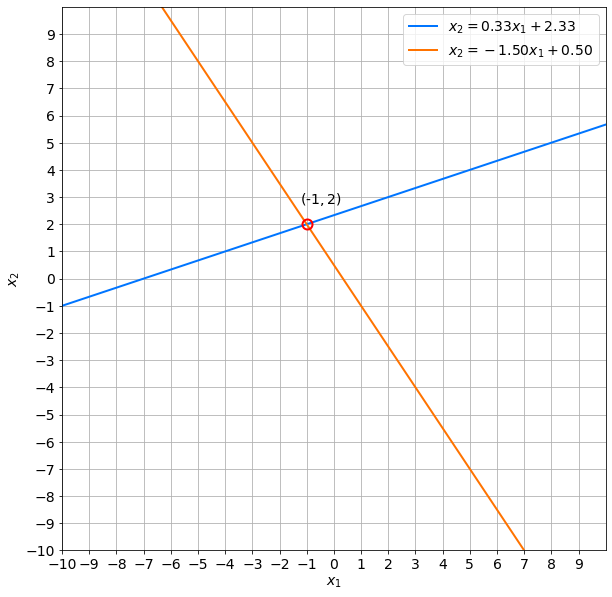

In [43]:
plot_lines(A_system)

<a name='3'></a>
## 3 - System of Linear Equations with No Solutions

Given another system of linear equations:

$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1-9x_2=1, \end{cases}\tag{5}$$

let's find the determinant of the corresponding matrix.

In [32]:
A_2 = np.array([
        [-1, 3],
        [3, -9]
    ], dtype=np.dtype(float))

b_2 = np.array([7, 1], dtype=np.dtype(float))

d_2 = np.linalg.det(A_2)

print(f"Determinant of matrix A_2: {d_2:.2f}")

Determinant of matrix A_2: -0.00


It is equal to zero, thus the system cannot have one unique solution. It will have either infinitely many solutions or none. The consistency of it will depend on the free coefficients (right side coefficients). You can run the code in the following cell to check that the `np.linalg.solve()` function will give an error due to singularity.

In [34]:
try:
    x_2 = np.linalg.solve(A_2, b_2)
except np.linalg.LinAlgError as err:
    print(err)

Prepare to apply the elimination method, constructing the matrix, corresponding to this linear system:

In [35]:
A_2_system = np.hstack((A_2, b_2.reshape((2, 1))))
print(A_2_system)

[[-1.  3.  7.]
 [ 3. -9.  1.]]


Perform elimination:

In [36]:
# copy() matrix.
A_2_system_res = A_2_system.copy()

# Multiply row 0 by 3 and add it to the row 1.
A_2_system_res[1] = 3 * A_2_system_res[0] + A_2_system_res[1]
print(A_2_system_res)

[[-1.  3.  7.]
 [ 0.  0. 22.]]


The last row will correspond to the equation $0=22$ which has no solution. Thus the whole linear system $(5)$ has no solutions. Let's see what will be on the graph. Do you expect the corresponding two lines to intersect?

In [49]:
print(A_system)
print(A_2_system)

[[-1.  3.  7.]
 [ 3.  2.  1.]]
[[-1.  3.  7.]
 [ 3. -9.  1.]]


In [45]:
A_system == A_2_system

array([[ True,  True,  True],
       [ True, False,  True]])

In [48]:
plot_lines(A_2_system)

ValueError: Image size of 1202590720x-1030791936 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

<a name='4'></a>
## 4 - System of Linear Equations with Infinite Number of Solutions

Changing free coefficients of the system $(5)$ you can bring it to consistency:

$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1-9x_2=-21, \end{cases}\tag{6}$$


In [38]:
b_3 = np.array([7, -21], dtype=np.dtype(float))

Prepare the new matrix, corresponding to the system $(6)$:

In [39]:
A_3_system = np.hstack((A_2, b_3.reshape((2, 1))))
print(A_3_system)

[[ -1.   3.   7.]
 [  3.  -9. -21.]]


Perform elimination using elementary operations:

In [40]:
# copy() matrix.
A_3_system_res = A_3_system.copy()

# Multiply row 0 by 3 and add it to the row 1.
A_3_system_res[1] = 3 * A_3_system_res[0] + A_3_system_res[1]
print(A_3_system_res)

[[-1.  3.  7.]
 [ 0.  0.  0.]]


Thus from the corresponding linear system

$$\begin{cases} 
-x_1+3x_2=7, \\ 0=0, \end{cases}\tag{7}$$

the solutions of the linear system $(6)$ are:

$$x_1=3x_2-7, \tag{8}$$

where $x_2$ is any real number.

If you plot the equations of the system, how many lines do you expect to see in the graph now? Check it, using the code below:

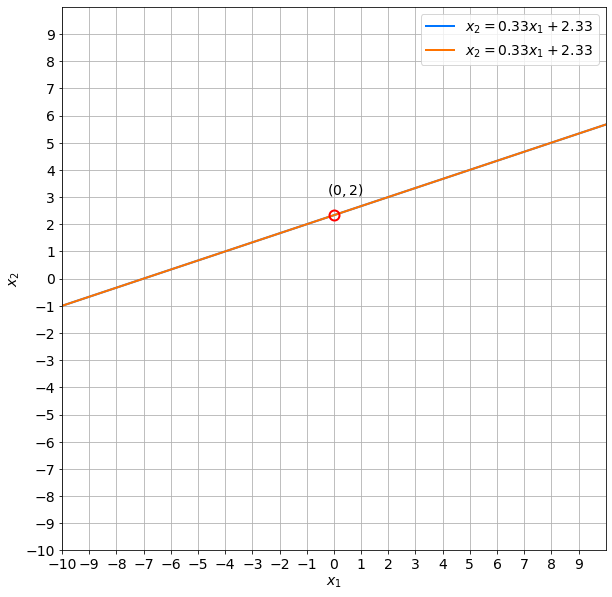

In [41]:
plot_lines(A_3_system)